<a href="https://colab.research.google.com/github/shanxar/Numpy_Pandas/blob/main/netflix_shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

USING DATA OF NETFLIX SHOWS FROM KAGGLLE ANALYSE VARIOUS TRENDS


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/netflix-shows


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 #LOAD DATASET
df=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
print("\nCOLUMNS IN DATASET")
print(df.columns)
print("\nDATAFRAME INFO")
print(df.info())
print("\nDATAFRAME DESCRIBE")
print(df.describe())

#HANDLE MISSSING VALUES

print("DIRECTOR COLUMN  MISSING VALUES COUNT ",df['director'].isnull().sum()) #COUNT NO OF VALUES MISSING IN DIR COLUMN
df['director']=df['director'].fillna("Unknown") #CHANGE MISSINGVALUE TO UNKNOWN
print("DIRECTOR COLUMN  MISSING VALUES COUNT ",df['director'].isnull().sum()) #COUNT NO OF VALUES MISSING IN DIR COLUMN

#CONVERT release_date column to pd.to_datetime format

def convert_date(date):
  if pd.isnull(date):
    return date
  else:
    return pd.to_datetime(date)






COLUMNS IN DATASET
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

DATAFRAME INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

DATAFRAME DESCRIBE
       release_



 MONTH ADDED
0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: month_added, Length: 8807, dtype: object
        month  no_of_movies
0       April           764
1      August           755
2    December           813
3    February           563
4     January           738
5        July           827
6        June           728
7       March           742
8         May           632
9    November           705
10    October           760
11  September           770


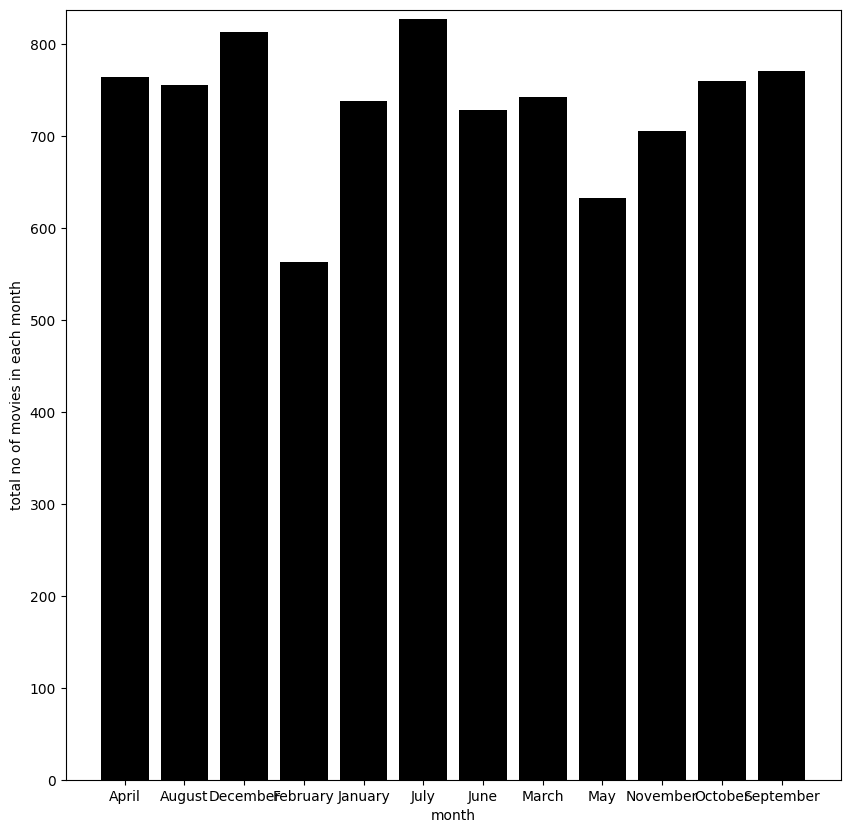

In [5]:
#CREATE A MONTH COLUMN
df['date_added']=df['date_added'].apply(convert_date)
df['month_added']=df['date_added'].dt.month_name()
print("\n\n MONTH ADDED")
print(df['month_added'])


#Create group by table using months and number of shows added in the months

months_shows=df.groupby('month_added').size().reset_index() #size() gives total no ofitems in each gorup
months_shows.columns=['month','no_of_movies']
print(months_shows)

#plott the months and shows
plt.figure(figsize=(10,10))
plt.bar(months_shows.month,months_shows.no_of_movies,color="black")
plt.xlabel("month")
plt.ylabel("total no of movies in each month")
plt.ylim(0,(months_shows['no_of_movies'].max()+10))
plt.show()


In [6]:
#Get the data of my 3 fav shows

import re


shows=["breaking bad ","naruto","attack on"]
filtered_df=pd.DataFrame()
filtered=pd.DataFrame()

for show in shows:
  show=show.strip()
  filtered=df[(df['title'].str.contains(show,case=False,na=False))]
  filtered_df=pd.concat([filtered_df,filtered])

print(filtered_df[['type','title','duration']])



#Convert seasons to minutes

def season_to_minutes(data):
  show_type=data['type']
  duration=data['duration']
  name=data['title']
  pattern=r"\d+"
  if show_type=="TV Show" :
    no_of_season=re.search(pattern,duration)
    no_of_season=no_of_season.group()
    if "naruto" in name or "attack" in name:
      minutes=int(no_of_season)*500
    else:
      minutes=int(no_of_season)*350
    return str(minutes)
  else:
    minutes=re.search(pattern,duration)
    minutes=minutes.group()
    return str(minutes)


filtered_df['duration_in_minutes']=filtered_df.apply(season_to_minutes,axis=1)
print(filtered_df)

         type                                              title   duration
3364    Movie  The Road to El Camino: Behind the Scenes of El...     14 min
3428    Movie                    El Camino: A Breaking Bad Movie    123 min
5940  TV Show                                       Breaking Bad  5 Seasons
56      Movie           Naruto Shippuden the Movie: Blood Prison    102 min
57      Movie                  Naruto Shippûden the Movie: Bonds     93 min
58      Movie       Naruto Shippûden the Movie: The Will of Fire     96 min
59      Movie                        Naruto Shippuden: The Movie     95 min
60      Movie        Naruto Shippuden: The Movie: The Lost Tower     85 min
61      Movie   Naruto the Movie 2: Legend of the Stone of Gelel     97 min
62      Movie  Naruto the Movie 3: Guardians of the Crescent ...     95 min
63      Movie  Naruto the Movie: Ninja Clash in the Land of Snow     83 min
3541  TV Show                                             Naruto  9 Seasons
7559    Movi

In [7]:
#PLOT THE DURATIONS OF THOSE 3 SHOWS

my_shows=filtered_df.groupby('title')['duration_in_minutes'].sum()
print(my_shows)

title
Attack on Titan                                                                 350
Breaking Bad                                                                   1750
El Camino: A Breaking Bad Movie                                                 123
Naruto                                                                         3150
Naruto Shippuden : Blood Prison                                                 102
Naruto Shippuden the Movie: Blood Prison                                        102
Naruto Shippuden: The Movie                                                      95
Naruto Shippuden: The Movie: The Lost Tower                                      85
Naruto Shippûden the Movie: Bonds                                                93
Naruto Shippûden the Movie: The Will of Fire                                     96
Naruto the Movie 2: Legend of the Stone of Gelel                                 97
Naruto the Movie 3: Guardians of the Crescent Moon Kingdom            

     show_id     type                                              title  \
3364   s3365    Movie  The Road to El Camino: Behind the Scenes of El...   
3428   s3429    Movie                    El Camino: A Breaking Bad Movie   
5940   s5941  TV Show                                       Breaking Bad   
56       s57    Movie           Naruto Shippuden the Movie: Blood Prison   
57       s58    Movie                  Naruto Shippûden the Movie: Bonds   
58       s59    Movie       Naruto Shippûden the Movie: The Will of Fire   
59       s60    Movie                        Naruto Shippuden: The Movie   
60       s61    Movie        Naruto Shippuden: The Movie: The Lost Tower   
61       s62    Movie   Naruto the Movie 2: Legend of the Stone of Gelel   
62       s63    Movie  Naruto the Movie 3: Guardians of the Crescent ...   
63       s64    Movie  Naruto the Movie: Ninja Clash in the Land of Snow   
3541   s3542  TV Show                                             Naruto   
7559   s7560

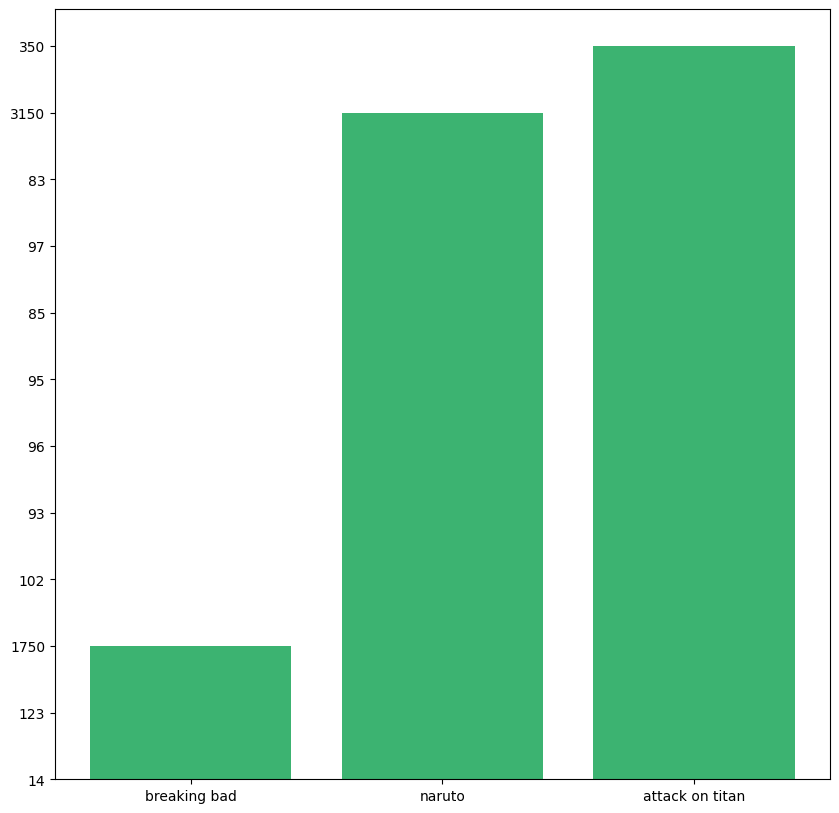

In [8]:
#CREATE A CLEAN TITLE

def clean_names(data):
  title=data['title']
  if "naruto" in title.lower():
    return "naruto"
  elif "breaking" in title.lower():
    return "breaking bad"
  else:
    return "attack on titan"

filtered_df['clean_name']=df.apply(clean_names,axis=1)
print(filtered_df)


#NOW PLOT

plt.figure(figsize=(10,10))
plt.bar(filtered_df.clean_name,filtered_df.duration_in_minutes,color="mediumseagreen")
plt.show()

In [22]:
# SURGE IN INDIAN SHOWS IN NEXTFLIX BEFORE 2020 VS AFTER 202
#COMPARE THE NO OF INDIAN TV SHOWS IN NETFLIX IN 2018,2019 VS 2020-2021

before_2020_india=df[(df['country'].isin(["India"])) & (df['release_year']<2020) & (df['release_year']>2018)&(df['type'].isin(["TV Show"]))]
print(before_2020_india.shape[0])

after_2020_india=df[(df['country'].isin(["India"])) & (df['release_year']>=2020) & (df['type'].isin(["TV Show"]))]
print(after_2020_india.shape[0])




13
25
